<a href="https://colab.research.google.com/github/Nisha40108/ADVANCED-MACHINE-LEARNING-64061-/blob/main/Assignment_4_Text%26Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4 - Text and Sequence Data using IMDB dataset**

# **Name: Nisha Chaurasia**

# **Date: 11-26-2023**

In [48]:
!pip install tensorflow==2.12

**Loading the important libraries**

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True

**Importing TensorFlow and Keras:**

In [50]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

#### Considering the IMDB example from Chapter 6. Re-running the example and modifying the  by **implementing a cutoff for reviews after 150 words, Training Sample - 100, Validation Sample - 10000, Consider only the top 10,000 words**

### **Model 1: Basic model from scratch**

In [51]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [52]:
train_texts.shape

(100, 150)

In [53]:
val_texts.shape

(10000, 150)

In [54]:
test_texts.shape

(5000, 150)

**Model Building**

In [55]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_5 (Flatten)         (None, 1200)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


**Model Execution**

In [56]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model1.h5",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_1 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
4/4 [==============================] - 2s 331ms/step - loss: 0.6898 - accuracy: 0.5600 - val_loss: 0.6933 - val_accuracy: 0.5006
Epoch 2/30
4/4 [==============================] - 1s 281ms/step - loss: 0.6679 - accuracy: 0.8900 - val_loss: 0.6932 - val_accuracy: 0.5021
Epoch 3/30
4/4 [==============================] - 1s 271ms/step - loss: 0.6525 - accuracy: 0.9600 - val_loss: 0.6932 - val_accuracy: 0.5040
Epoch 4/30
4/4 [==============================] - 1s 292ms/step - loss: 0.6388 - accuracy: 0.9900 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 5/30
4/4 [==============================] - 1s 313ms/step - loss: 0.6261 - accuracy: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.5084
Epoch 6/30
4/4 [==============================] - 1s 328ms/step - loss: 0.6130 - accuracy: 1.0000 - val_loss: 0.6932 - val_accuracy: 0.5069
Epoch 7/30
4/4 [==============================] - 1s 318ms/step - loss: 0.5997 - accuracy: 1.0000 - val_loss: 0.6932 - val_accuracy: 0.5080
Epoch 8/30
4/4 [====

**Ploating the Accuracy and loss for training and validation**

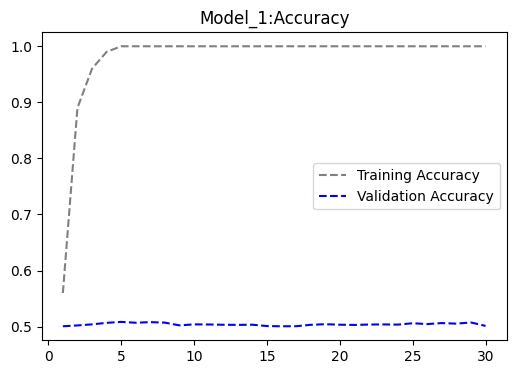

<Figure size 640x480 with 0 Axes>

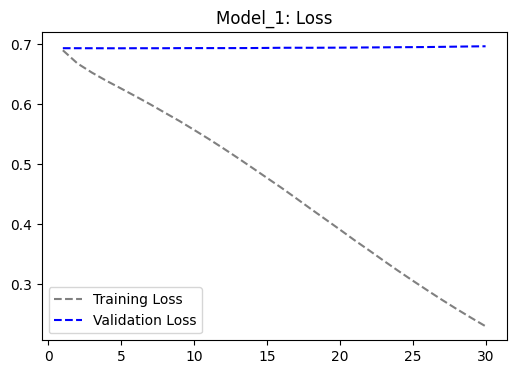

In [57]:
accuracy = Model_1.history['accuracy']
val_accuracy = Model_1.history['val_accuracy']

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_1:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_1: Loss")
plt.legend()
plt.show()

In [58]:
test_model = load_model('model1.h5')
Model1_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5112
Loss: 0.693
Accuracy: 0.511


The model with 100 training samples which was built with just an embedding layer resulted in 51.7% Accuracy, which is not that bad because the model was just trained with 100 Samples.

### **Model 2: Increasing the training sample to 1000 and with Embedding Layer**

In [59]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=10000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [60]:
train_texts.shape

(10000, 150)

In [61]:
val_texts.shape

(10000, 150)

In [62]:
test_texts.shape

(5000, 150)

In [63]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_6 (Flatten)         (None, 1200)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model2.h5",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 18s 57ms/step - loss: 0.6756 - accuracy: 0.6157 - val_loss: 0.6307 - val_accuracy: 0.7221
Epoch 2/30
313/313 [==============================] - 6s 21ms/step - loss: 0.5129 - accuracy: 0.8111 - val_loss: 0.4458 - val_accuracy: 0.8216
Epoch 3/30
313/313 [==============================] - 4s 12ms/step - loss: 0.3517 - accuracy: 0.8707 - val_loss: 0.3622 - val_accuracy: 0.8498
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 0.2739 - accuracy: 0.8968 - val_loss: 0.3338 - val_accuracy: 0.8591
Epoch 5/30
313/313 [==============================] - 3s 9ms/step - loss: 0.2254 - accuracy: 0.9199 - val_loss: 0.3223 - val_accuracy: 0.8626
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 0.1899 - accuracy: 0.9344 - val_loss: 0.3145 - val_accuracy: 0.8665
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 0.1594 - accuracy: 0.9475 - val_loss: 0.3172 - val_accuracy: 0.8645
Ep

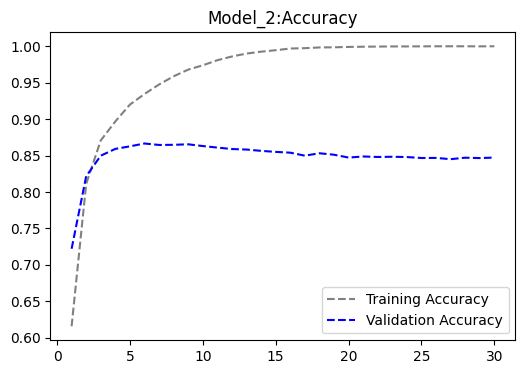

<Figure size 640x480 with 0 Axes>

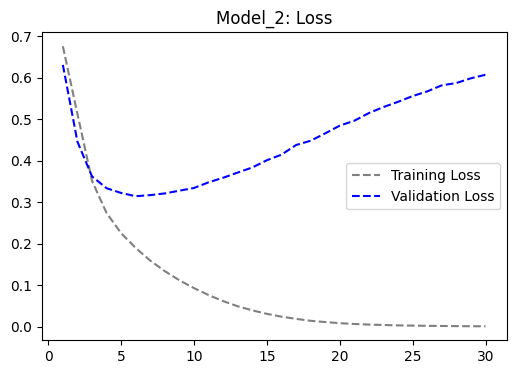

In [65]:
accuracy = Model_2.history['accuracy']
val_accuracy = Model_2.history['val_accuracy']

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_2:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_2: Loss")
plt.legend()
plt.show()

In [66]:
test_model = load_model('model2.h5')
Model2_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.8800
Loss: 0.280
Accuracy: 0.880


Model 3: Increase training size to 25000, everything else same

In [73]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=25000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [74]:
train_texts.shape

(25000, 150)

In [75]:
val_texts.shape

(10000, 150)

In [76]:
test_texts.shape

(5000, 150)

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

In [77]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.h5",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_3 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
782/782 [==============================] - 6s 8ms/step - loss: 0.3465 - accuracy: 0.8759 - val_loss: 0.4622 - val_accuracy: 0.8167
Epoch 2/30
782/782 [==============================] - 6s 8ms/step - loss: 0.2618 - accuracy: 0.9003 - val_loss: 0.4479 - val_accuracy: 0.8214
Epoch 3/30
782/782 [==============================] - 6s 8ms/step - loss: 0.2295 - accuracy: 0.9137 - val_loss: 0.4294 - val_accuracy: 0.8246
Epoch 4/30
782/782 [==============================] - 6s 8ms/step - loss: 0.2078 - accuracy: 0.9246 - val_loss: 0.4270 - val_accuracy: 0.8231
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 0.1848 - accuracy: 0.9327 - val_loss: 0.4361 - val_accuracy: 0.8128
Epoch 6/30
782/782 [==============================] - 6s 8ms/step - loss: 0.1634 - accuracy: 0.9450 - val_loss: 0.4242 - val_accuracy: 0.8181
Epoch 7/30
782/782 [==============================] - 6s 8ms/step - loss: 0.1472 - accuracy: 0.9505 - val_loss: 0.4216 - val_accuracy: 0.8159
Epoch 

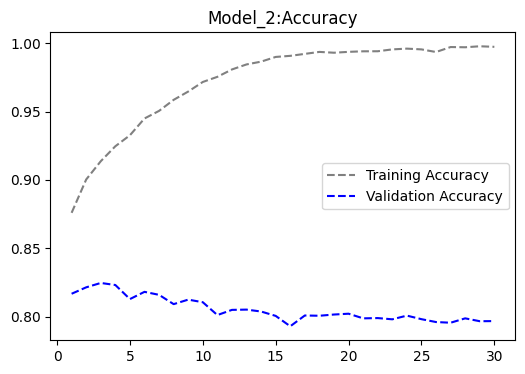

<Figure size 640x480 with 0 Axes>

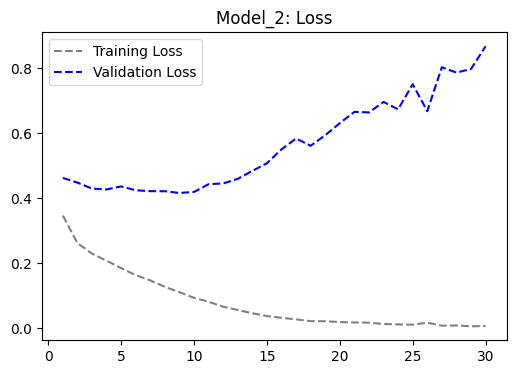

In [78]:
accuracy = Model_3.history['accuracy']
val_accuracy = Model_3.history['val_accuracy']

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_3:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_3: Loss")
plt.legend()
plt.show()

In [79]:
test_model = load_model('model3.h5')
Model3_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

157/157 [==============================] - 1s 3ms/step - loss: 0.3225 - accuracy: 0.8852
Loss: 0.322
Accuracy: 0.885


Model 4: Use same training size but use convolution 1D and Embadding layer together

In [68]:
model = Sequential()

maxlen = 150
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d_3 (Conv1D)           (None, 148, 512)          12800     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 49, 512)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 15, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 256)          

In [69]:
callbacks = ModelCheckpoint(
            filepath= "model3.h5",
            save_best_only= True,
            monitor= "val_loss"
            )

Model_3 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 41s 109ms/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 2/30
313/313 [==============================] - 10s 32ms/step - loss: 0.6794 - accuracy: 0.5583 - val_loss: 0.6681 - val_accuracy: 0.6064
Epoch 3/30
313/313 [==============================] - 6s 18ms/step - loss: 0.4698 - accuracy: 0.7763 - val_loss: 0.5529 - val_accuracy: 0.7997
Epoch 4/30
313/313 [==============================] - 7s 22ms/step - loss: 0.3329 - accuracy: 0.8553 - val_loss: 0.5084 - val_accuracy: 0.8122
Epoch 5/30
313/313 [==============================] - 5s 16ms/step - loss: 0.2707 - accuracy: 0.8904 - val_loss: 0.4855 - val_accuracy: 0.8145
Epoch 6/30
313/313 [==============================] - 5s 15ms/step - loss: 0.2236 - accuracy: 0.9113 - val_loss: 0.4760 - val_accuracy: 0.7993
Epoch 7/30
313/313 [==============================] - 4s 12ms/step - loss: 0.1854 - accuracy: 0.9336 - val_loss: 0.4640 - val_accuracy: 0.7

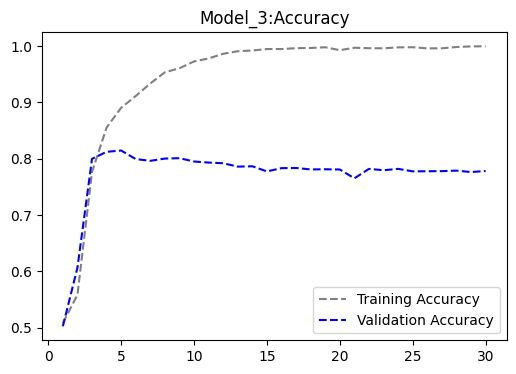

<Figure size 640x480 with 0 Axes>

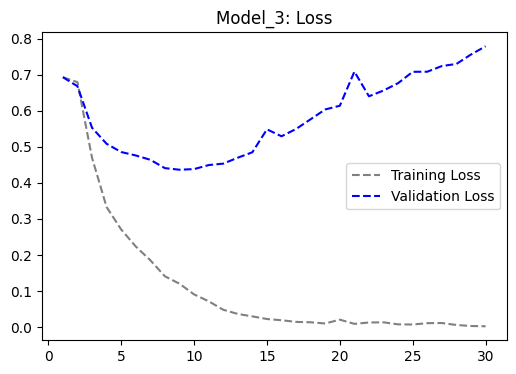

In [70]:
accuracy = Model_3.history['accuracy']
val_accuracy = Model_3.history['val_accuracy']

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_3:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_3: Loss")
plt.legend()
plt.show()

In [72]:
test_model = load_model('model3.h5')
Model3_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

157/157 [==============================] - 1s 4ms/step - loss: 0.3961 - accuracy: 0.8322
Loss: 0.396
Accuracy: 0.832
